Available CSV files: ['drgcodes.csv', 'omr.csv', 'emar_detail.csv', 'microbiologyevents.csv', 'services.csv', 'pharmacy.csv', 'transfers.csv', 'emar.csv', 'hcpcsevents.csv', 'poe_detail.csv', 'poe.csv', 'd_icd_procedures.csv', 'd_icd_diagnoses.csv', 'd_labitems.csv', 'diagnoses_icd.csv', 'patients.csv', 'procedures_icd.csv', 'admissions.csv', 'prescriptions.csv', 'd_hcpcs.csv', 'labevents.csv']

Summary of PATIENTS:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299777 entries, 0 to 299776
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   subject_id         299777 non-null  int64 
 1   gender             299777 non-null  object
 2   anchor_age         299777 non-null  int64 
 3   anchor_year        299777 non-null  int64 
 4   anchor_year_group  299777 non-null  object
 5   dod                29088 non-null   object
dtypes: int64(3), object(3)
memory usage: 13.7+ MB
None
          subject_id  gender  

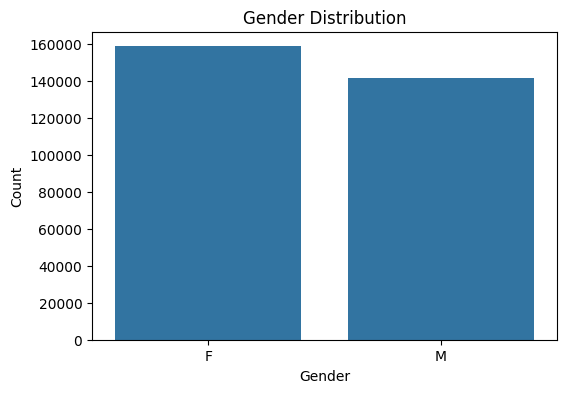

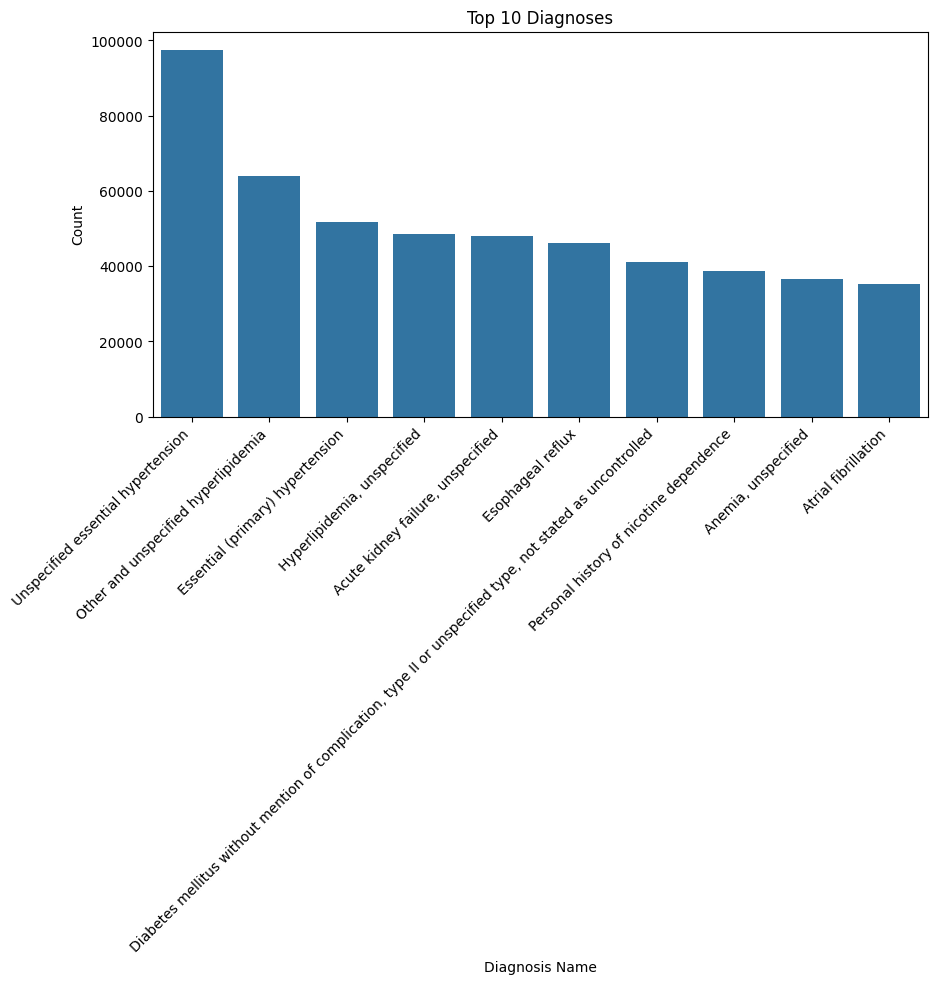


Summary of ICU STAYS:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73141 entries, 0 to 73140
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   subject_id      73141 non-null  int64  
 1   hadm_id         73141 non-null  int64  
 2   stay_id         73141 non-null  int64  
 3   first_careunit  73141 non-null  object 
 4   last_careunit   73141 non-null  object 
 5   intime          73141 non-null  object 
 6   outtime         73141 non-null  object 
 7   los             73141 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 4.5+ MB
None
          subject_id       hadm_id       stay_id  \
count   7.314100e+04  7.314100e+04  7.314100e+04   
unique           NaN           NaN           NaN   
top              NaN           NaN           NaN   
freq             NaN           NaN           NaN   
mean    1.499709e+07  2.498276e+07  3.499355e+07   
std     2.888155e+06  2.885572e+06  2.88

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_dir = "./data/hosp"

# List available CSV files
csv_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]
print("Available CSV files:", csv_files)

patients_df = pd.read_csv(os.path.join(data_dir, "patients.csv"))
admissions_df = pd.read_csv(os.path.join(data_dir, "admissions.csv"))
diagnoses_df = pd.read_csv(os.path.join(data_dir, "diagnoses_icd.csv"))

def dataset_summary(df, name):
    print(f"\nSummary of {name}:")
    print(df.info())
    print(df.describe(include="all"))
    print(f"Missing Values:\n{df.isnull().sum()}")

dataset_summary(patients_df, "PATIENTS")

dataset_summary(admissions_df, "ADMISSIONS")

dataset_summary(diagnoses_df, "DIAGNOSES_ICD")

# -------------------
# Patient Demographics
# -------------------
# Gender Distribution
plt.figure(figsize=(6,4))
sns.countplot(x="gender", data=patients_df)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


# -------------------
# Most Common Diagnoses
# -------------------
# Merge Diagnoses with Admissions
diagnoses_with_admit = diagnoses_df.merge(admissions_df, on="hadm_id", how="left")

# Count Top Diagnoses
top_diagnoses = diagnoses_with_admit["icd_code"].value_counts().head(10)
dx_mapping_file = os.path.join(data_dir, "d_icd_diagnoses.csv")
dx_mapping_df = pd.read_csv(dx_mapping_file)
diagnoses_with_admit = diagnoses_df.merge(admissions_df, on="hadm_id", how="left")
diagnoses_with_admit = diagnoses_with_admit.merge(dx_mapping_df, on="icd_code", how="left")

    # Count top diagnoses
top_diagnoses = diagnoses_with_admit["long_title"].value_counts().head(10)


plt.figure(figsize=(10,5))
sns.barplot(x=top_diagnoses.index, y=top_diagnoses.values)
plt.title("Top 10 Diagnoses")
plt.xlabel("Diagnosis Name")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.show()

# -------------------
# ICU Stays & Mortality
# -------------------
# ICU Admissions
icu_stays_df = pd.read_csv(os.path.join("./data/icu/icustays.csv"))
dataset_summary(icu_stays_df, "ICU STAYS")

# Mortality Rate
mortality_rate = patients_df["dod"].notnull().mean() * 100
print(f"\nOverall Mortality Rate: {mortality_rate:.2f}%")

# ICU Mortality
icu_mortality_rate = icu_stays_df.merge(patients_df, on="subject_id")["dod"].notnull().mean() * 100
print(f"ICU Mortality Rate: {icu_mortality_rate:.2f}%")

In [2]:
# Calculate mortality rate by diagnosis
mortality_by_diagnosis = diagnoses_with_admit.groupby("long_title")["hospital_expire_flag"].mean() * 100

# Sort by highest mortality rate
mortality_by_diagnosis = mortality_by_diagnosis.sort_values(ascending=False)

# Display the top 10 diagnoses with the highest mortality rates
print(mortality_by_diagnosis.head(10))

long_title
Unstable burst fracture of third thoracic vertebra, initial encounter for closed fracture                                100.0
Varicella pneumonia                                                                                                      100.0
Complete lesion at T2-T6 level of thoracic spinal cord, initial encounter                                                100.0
Complete lesion at T11-T12 level of thoracic spinal cord, initial encounter                                              100.0
Injury by handgun, undetermined whether accidentally or purposely inflicted                                              100.0
Chronic or unspecified gastric ulcer with hemorrhage and perforation, with obstruction                                   100.0
Malignant otitis externa, unspecified ear                                                                                100.0
Abnormal bowel sounds                                                                               

Patients columns: ['subject_id', 'gender', 'anchor_age', 'anchor_year', 'anchor_year_group', 'dod']
Admissions columns: ['subject_id', 'hadm_id', 'admittime', 'dischtime', 'deathtime', 'admission_type', 'admission_location', 'discharge_location', 'insurance', 'language', 'marital_status', 'race', 'edregtime', 'edouttime', 'hospital_expire_flag']

Top 10 Diagnoses by Mortality Rate:
          patient_count  death_count  mortality_rate
icd_code                                            
0860                  1           11     1100.000000
99687                 1           10     1000.000000
V1012                 2           18      900.000000
C381                  3           21      700.000000
20310                 3           19      633.333333
C4001                 2           12      600.000000
20312                 2           12      600.000000
Q131                  2           12      600.000000
A1782                 1            5      500.000000
Q315                  1         

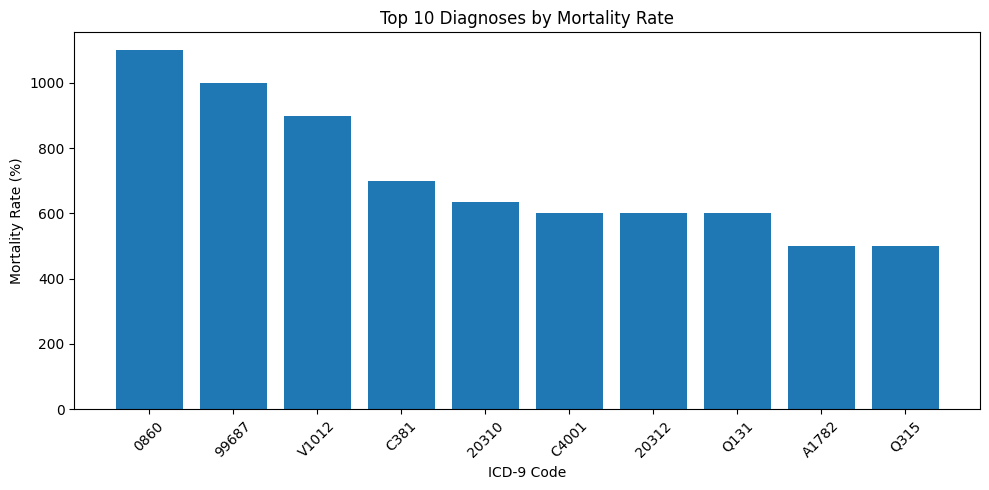

In [3]:
# Ensure all dataframes have lowercase column names.
patients_df = pd.read_csv(os.path.join(data_dir, "patients.csv")).rename(columns=str.lower)
admissions_df = pd.read_csv(os.path.join(data_dir, "admissions.csv")).rename(columns=str.lower)
diagnoses_df = pd.read_csv(os.path.join(data_dir, "diagnoses_icd.csv")).rename(columns=str.lower)

diagnoses_df = diagnoses_df.drop(columns=['subject_id'], errors='ignore')

print("Patients columns:", patients_df.columns.tolist())
print("Admissions columns:", admissions_df.columns.tolist())

diagnoses_with_patients = (
    diagnoses_df
    .merge(
        admissions_df[['hadm_id', 'subject_id']],
        on='hadm_id',
        how='left'
    )
    .merge(
        patients_df[['subject_id', 'dod']],
        on='subject_id',
        how='left'
    )
)

diagnoses_with_patients.head()

# Group by icd9_code to compute mortality statistics
grouped = diagnoses_with_patients.groupby('icd_code').agg(
    patient_count=('subject_id', 'nunique'),
    death_count=('dod', lambda x: x.notnull().sum())
)

# Calculate mortality rate (in percent)
grouped['mortality_rate'] = grouped['death_count'] / grouped['patient_count'] * 100

# Sort by mortality rate descending and select top 10
top_10_mortality = grouped.sort_values('mortality_rate', ascending=False).head(10)

print("\nTop 10 Diagnoses by Mortality Rate:")
print(top_10_mortality)

# Plot top 10 diagnoses by mortality rate
plt.figure(figsize=(10,5))
plt.bar(top_10_mortality.index, top_10_mortality['mortality_rate'])
plt.title("Top 10 Diagnoses by Mortality Rate")
plt.xlabel("ICD-9 Code")
plt.ylabel("Mortality Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Total mental health (ICD-9: 290-319) diagnosis rows: 189082
Unique patients with MH diagnoses (ICD 290-319): 55104

Top 10 ICD-9 Mental Health Codes (290–319) by Frequency:
long_title
Depressive disorder, not elsewhere classified                                 34493
Tobacco use disorder                                                          24636
Anxiety state, unspecified                                                    21244
Alcohol abuse, unspecified                                                    11331
Dysthymic disorder                                                             5563
Bipolar disorder, unspecified                                                  5533
Posttraumatic stress disorder                                                  4394
Delirium due to conditions classified elsewhere                                3729
Dementia, unspecified, without behavioral disturbance                          3121
Dementia in conditions classified elsewhere without behavior

/tmp/ipykernel_1417/3689897379.py:71: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


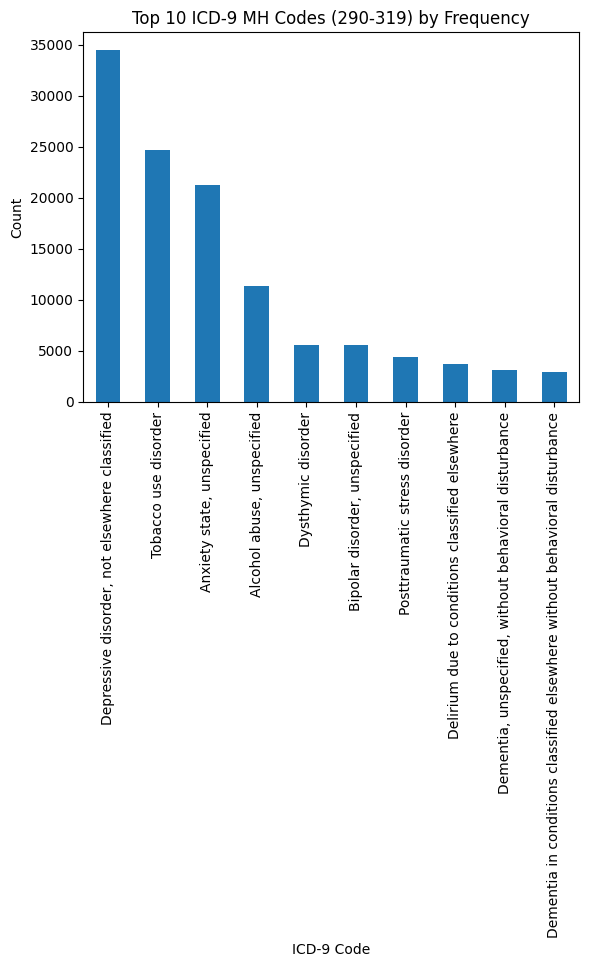


Mortality Rates by Mental Health Disorders:


KeyError: "['icd9_code', 'short_description'] not in index"

In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Use the same data directory as in the other cells.
data_dir = "./data/hosp"

# Load datasets and immediately standardize column names to lowercase.
patients_df   = pd.read_csv(os.path.join(data_dir, "patients.csv")).rename(columns=str.lower)
admissions_df = pd.read_csv(os.path.join(data_dir, "admissions.csv")).rename(columns=str.lower)
diagnoses_df  = pd.read_csv(os.path.join(data_dir, "diagnoses_icd.csv")).rename(columns=str.lower)

# Load the ICD-9 descriptions file and standardize its columns 
icd_desc_df = pd.read_csv(os.path.join(data_dir, "d_icd_diagnoses.csv"))
icd_desc_df.columns = [col.strip().lower().replace(" ", "_") for col in icd_desc_df.columns]

# -------------------------------------------------------------------------------
# 2. Define a helper to check if ICD-9 code is in the 290-319 mental health range
# -------------------------------------------------------------------------------
def is_mh_code(icd_code: str) -> bool:
    """
    Returns True if the first three characters of the ICD code (as string)
    represent a number between 290 and 319, including any subcategories.
    """
    try:
        disorder = int(icd_code[:3])
        return 290 <= disorder <= 319
    except (ValueError, TypeError):
        return False

# Ensure the 'icd9_code' column is a string, then filter for mental health codes.
diagnoses_df['icd_code'] = diagnoses_df['icd_code'].astype(str)
mh_diagnoses = diagnoses_df[diagnoses_df['icd_code'].apply(is_mh_code)]

# -------------------------------------------------------------------------------
# 3. Merge the MH diagnoses with Admissions and Patients 
#    (to gather demographic, time, and mortality info)
# -------------------------------------------------------------------------------
merged_mh_df = pd.merge(
    mh_diagnoses,
    admissions_df[['subject_id','hadm_id','admittime','dischtime','deathtime','hospital_expire_flag']],
    on='hadm_id',
    how='left'
)

merged_mh_df = pd.merge(
    merged_mh_df,
    icd_desc_df[['icd_code','long_title']],
    on='icd_code',
    how='left'
)

# -------------------------------------------------------------------------------
# 4. Print Out Basic Summary Stats
# -------------------------------------------------------------------------------
total_mh_diagnoses = len(merged_mh_df)
print(f"Total mental health (ICD-9: 290-319) diagnosis rows: {total_mh_diagnoses}")

unique_patients_mh = mh_diagnoses['subject_id'].nunique()
print(f"Unique patients with MH diagnoses (ICD 290-319): {unique_patients_mh}")

top_10_codes = merged_mh_df['long_title'].value_counts().head(10)
print("\nTop 10 ICD-9 Mental Health Codes (290–319) by Frequency:")
print(top_10_codes)

plt.figure()
top_10_codes.plot(kind='bar')
plt.title("Top 10 ICD-9 MH Codes (290-319) by Frequency")
plt.xlabel("ICD-9 Code")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

mortality_stat = (
    merged_mh_df
    .groupby('icd_code')
    .agg(
        total_addmissions=('hadm_id', 'nunique'),
        total_deaths=('hospital_expire_flag', 'sum')
    )
    .assign(mortality_rate = lambda x: x['total_deaths'] / x['total_addmissions'] * 100)
    .reset_index()
)
mortality_stat = mortality_stat.merge(icd_desc_df, on='icd_code', how='left')
mortality_stat_sorted = mortality_stat.sort_values('mortality_rate', ascending=False)
print("\nMortality Rates by Mental Health Disorders:")
print(mortality_stat_sorted[['icd9_code','short_description','mortality_rate']].head(10))

HERERE    ROW_ID  SUBJECT_ID  HADM_ID            ADMITTIME            DISCHTIME  \
0      21          22   165315  2196-04-09 12:26:00  2196-04-10 15:54:00   
1      22          23   152223  2153-09-03 07:15:00  2153-09-08 19:10:00   
2      23          23   124321  2157-10-18 19:34:00  2157-10-25 14:00:00   
3      24          24   161859  2139-06-06 16:14:00  2139-06-09 12:48:00   
4      25          25   129635  2160-11-02 02:06:00  2160-11-05 14:55:00   

  DEATHTIME ADMISSION_TYPE         ADMISSION_LOCATION  \
0       NaN      EMERGENCY       EMERGENCY ROOM ADMIT   
1       NaN       ELECTIVE  PHYS REFERRAL/NORMAL DELI   
2       NaN      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
3       NaN      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
4       NaN      EMERGENCY       EMERGENCY ROOM ADMIT   

          DISCHARGE_LOCATION INSURANCE LANGUAGE           RELIGION  \
0  DISC-TRAN CANCER/CHLDRN H   Private      NaN       UNOBTAINABLE   
1           HOME HEALTH CARE  Medicare      NaN      

<Figure size 640x480 with 0 Axes>

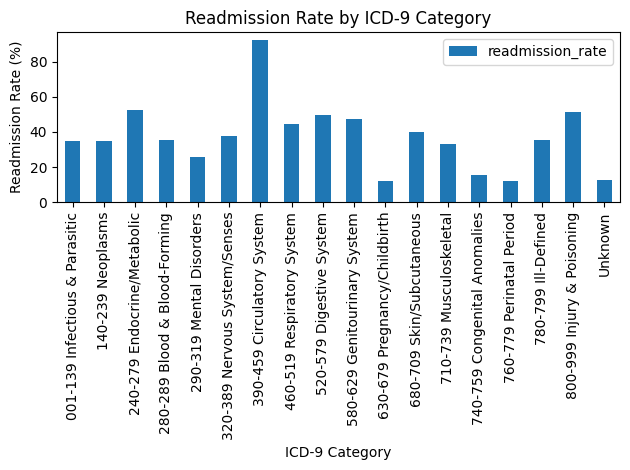

<Figure size 640x480 with 0 Axes>

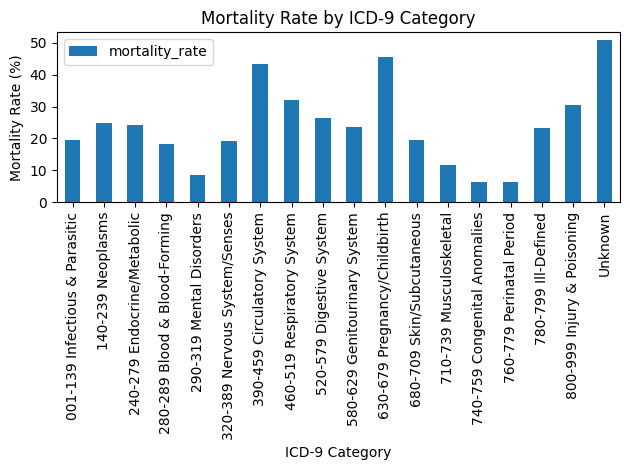

In [ ]:
def icd9_to_category(icd_str: str) -> str:
    """
    Returns the high-level ICD-9 range, e.g. '290-319' for mental disorders,
    '001-139' for infectious diseases, etc.
    The categorization is based on the first three digits of the ICD-9 code.
    """
    try:
        # Remove any non-digit characters (like periods) and ensure at least 3 digits
        digits = ''.join(filter(str.isdigit, icd_str))
        if len(digits) < 3:
            digits = digits.zfill(3)
        code_int = int(digits[:3])
    except (ValueError, TypeError):
        return "Unknown"

    if   1    <= code_int <= 139: return "001-139 Infectious & Parasitic"
    elif 140  <= code_int <= 239: return "140-239 Neoplasms"
    elif 240  <= code_int <= 279: return "240-279 Endocrine/Metabolic"
    elif 280  <= code_int <= 289: return "280-289 Blood & Blood-Forming"
    elif 290  <= code_int <= 319: return "290-319 Mental Disorders"
    elif 320  <= code_int <= 389: return "320-389 Nervous System/Senses"
    elif 390  <= code_int <= 459: return "390-459 Circulatory System"
    elif 460  <= code_int <= 519: return "460-519 Respiratory System"
    elif 520  <= code_int <= 579: return "520-579 Digestive System"
    elif 580  <= code_int <= 629: return "580-629 Genitourinary System"
    elif 630  <= code_int <= 679: return "630-679 Pregnancy/Childbirth"
    elif 680  <= code_int <= 709: return "680-709 Skin/Subcutaneous"
    elif 710  <= code_int <= 739: return "710-739 Musculoskeletal"
    elif 740  <= code_int <= 759: return "740-759 Congenital Anomalies"
    elif 760  <= code_int <= 779: return "760-779 Perinatal Period"
    elif 780  <= code_int <= 799: return "780-799 Ill-Defined"
    elif 800  <= code_int <= 999: return "800-999 Injury & Poisoning"
    else:                         return "Unknown"
    

diag_adm = pd.merge(
    diagnoses_df[['SUBJECT_ID','HADM_ID','ICD9_CODE']], 
    admissions_df[['SUBJECT_ID','HADM_ID','ADMITTIME','DISCHTIME','DEATHTIME','HOSPITAL_EXPIRE_FLAG']],
    on=['SUBJECT_ID','HADM_ID'],
    how='inner'
)


diag_adm['ICD9_CATEGORY'] = diag_adm['ICD9_CODE'].apply(icd9_to_category)

# Sort admissions by subject, then by ADMITTIME
admissions_sorted = admissions_df.sort_values(['SUBJECT_ID', 'ADMITTIME'])

# We'll create a new column "HAS_READMISSION" in admissions_df.
# For each admission, we'll see if there's a next row (for the same SUBJECT_ID)
# that has an ADMITTIME > this row's DISCHTIME.
has_readmit_list = []
for i in range(len(admissions_sorted)):
    curr_row = admissions_sorted.iloc[i]
    # Check next row if it belongs to the same patient
    if i < len(admissions_sorted) - 1:
        next_row = admissions_sorted.iloc[i+1]
        if (
            curr_row['SUBJECT_ID'] == next_row['SUBJECT_ID'] and
            next_row['ADMITTIME'] > curr_row['DISCHTIME']
        ):
            has_readmit_list.append(True)
        else:
            has_readmit_list.append(False)
    else:
        # last row, no next admission
        has_readmit_list.append(False)

# Attach this back to the admissions DataFrame
admissions_sorted['HAS_READMISSION'] = has_readmit_list

# Now merge this info back to the main admissions_df by HADM_ID if needed
admissions_df = admissions_df.merge(
    admissions_sorted[['HADM_ID','HAS_READMISSION']],
    on='HADM_ID',
    how='left'
)

print("HERERE", admissions_df.head())
# Merge category info (from diag_adm) with the readmission flag (from admissions_df)
diag_adm = pd.merge(
    diag_adm,
    admissions_df[['HADM_ID','HAS_READMISSION','HOSPITAL_EXPIRE_FLAG']],
    on='HADM_ID',
    how='left'
)

print("DAT", diag_adm.head())

# Now group by category
grouped = diag_adm.groupby('ICD9_CATEGORY').agg(
    total_admissions=('HADM_ID', 'nunique'),         # distinct admissions in this category
    total_deaths=('HOSPITAL_EXPIRE_FLAG_x', 'sum'),    # sum of the 1/0 flags
    total_readmit=('HAS_READMISSION', 'sum')         # sum of the True/False readmission flags
).reset_index()

grouped['mortality_rate']    = grouped['total_deaths']   / grouped['total_admissions'] * 100
grouped['readmission_rate']  = grouped['total_readmit']  / grouped['total_admissions'] * 100

# Sort or just display
grouped_sorted = grouped.sort_values('ICD9_CATEGORY')  # or sort by mortality_rate desc, etc.
print(grouped_sorted[['ICD9_CATEGORY','total_admissions','mortality_rate','readmission_rate']])

import matplotlib.pyplot as plt

# Compare readmission rates visually
plt.figure()
grouped_sorted.plot(
    x='ICD9_CATEGORY', 
    y='readmission_rate', 
    kind='bar'
)
plt.title("Readmission Rate by ICD-9 Category")
plt.xlabel("ICD-9 Category")
plt.ylabel("Readmission Rate (%)")
plt.tight_layout()
plt.show()

# Compare mortality rates visually
plt.figure()
grouped_sorted.plot(
    x='ICD9_CATEGORY', 
    y='mortality_rate', 
    kind='bar'
)
plt.title("Mortality Rate by ICD-9 Category")
plt.xlabel("ICD-9 Category")
plt.ylabel("Mortality Rate (%)")
plt.tight_layout()
plt.show()

In [3]:
import pandas as pd
import os
data_dir = "./data/hosp"
csv_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]

for file in csv_files:
    file_path = os.path.join(data_dir, file)
    try:
        df = pd.read_csv(file_path, nrows=5)  
        print(f"File: {file}")
        print("Columns:", df.columns.tolist())
        print("-" * 50)
    except Exception as e:
        print(f"Could not read {file}: {e}")

File: drgcodes.csv
Columns: ['subject_id', 'hadm_id', 'drg_type', 'drg_code', 'description', 'drg_severity', 'drg_mortality']
--------------------------------------------------
File: omr.csv
Columns: ['subject_id', 'chartdate', 'seq_num', 'result_name', 'result_value']
--------------------------------------------------
File: emar_detail.csv
Columns: ['subject_id', 'emar_id', 'emar_seq', 'parent_field_ordinal', 'administration_type', 'pharmacy_id', 'barcode_type', 'reason_for_no_barcode', 'complete_dose_not_given', 'dose_due', 'dose_due_unit', 'dose_given', 'dose_given_unit', 'will_remainder_of_dose_be_given', 'product_amount_given', 'product_unit', 'product_code', 'product_description', 'product_description_other', 'prior_infusion_rate', 'infusion_rate', 'infusion_rate_adjustment', 'infusion_rate_adjustment_amount', 'infusion_rate_unit', 'route', 'infusion_complete', 'completion_interval', 'new_iv_bag_hung', 'continued_infusion_in_other_location', 'restart_interval', 'side', 'site', 'n

In [4]:
csv_files = [f for f in os.listdir('./data/icu') if f.endswith('.csv')]

for file in csv_files:
    file_path = os.path.join('./data/icu', file)
    try:
        df = pd.read_csv(file_path, nrows=5) 
        print(f"File: {file}")
        print("Columns:", df.columns.tolist())
        print("-" * 50)
    except Exception as e:
        print(f"Could not read {file}: {e}")

File: datetimeevents.csv
Columns: ['subject_id', 'hadm_id', 'stay_id', 'charttime', 'storetime', 'itemid', 'value', 'valueuom', 'warning']
--------------------------------------------------
File: procedureevents.csv
Columns: ['subject_id', 'hadm_id', 'stay_id', 'starttime', 'endtime', 'storetime', 'itemid', 'value', 'valueuom', 'location', 'locationcategory', 'orderid', 'linkorderid', 'ordercategoryname', 'ordercategorydescription', 'patientweight', 'isopenbag', 'continueinnextdept', 'statusdescription', 'originalamount', 'originalrate']
--------------------------------------------------
File: inputevents.csv
Columns: ['subject_id', 'hadm_id', 'stay_id', 'starttime', 'endtime', 'storetime', 'itemid', 'amount', 'amountuom', 'rate', 'rateuom', 'orderid', 'linkorderid', 'ordercategoryname', 'secondaryordercategoryname', 'ordercomponenttypedescription', 'ordercategorydescription', 'patientweight', 'totalamount', 'totalamountuom', 'isopenbag', 'continueinnextdept', 'statusdescription', 'ori